## 1. Requeriments

In [494]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [495]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

## 3. Graph building

### 3.1. Gene matrix

In [496]:
genes = pd.read_csv('..\..\Data\PPT-Ohmnet\mRCC_big_pool\mrcc_protein_matrix_151_genes_41_nodes.csv')
Y = genes.Y

genes = genes.iloc[:,1:42] 
genes

,APAF1,ARID1A,ATM,BAP1,CASP2,CRADD,CRYAB,DNMT1,DNMT3A,EPAS1,...,RNF139,SETD2,SLC2A1,SOD2,TGM2,TP53,TSC1,TSC2,VEGFA,VHL
0,32.668769,33.848026,35.942429,33.677294,33.689015,34.20040,39.95791,35.15140,31.75476,37.95811,...,32.46554,32.58565,33.38586,38.67433,38.50142,33.83518,32.93402,34.93520,37.79678,32.30615
1,32.337493,33.843513,35.988225,32.643149,33.946812,33.33414,39.76850,34.78386,32.83981,38.83281,...,32.27190,33.19915,33.69538,38.64559,34.33752,34.44810,33.16630,35.08304,40.09193,32.19988
2,31.818198,33.516005,36.193587,32.368866,33.752815,31.15063,40.93124,34.97395,32.26242,37.19345,...,32.55514,32.84628,36.23588,40.50559,35.50178,35.41980,33.63282,34.79244,38.22308,31.49147
3,32.601293,34.197698,36.578348,31.895400,34.064332,32.93107,40.02236,35.07183,32.64948,39.46713,...,33.19823,33.68316,34.41938,38.99231,35.77236,34.18862,32.88250,35.02014,39.94908,32.11538
4,33.593121,33.351460,36.807497,33.968348,33.501184,33.49363,38.83921,35.23627,33.75096,38.49884,...,30.89813,34.63036,34.59911,38.41437,33.47112,34.91241,33.44515,35.01310,39.31564,33.33646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,32.603769,34.133940,35.318612,33.843872,33.840555,31.12858,37.79607,35.72355,32.20131,39.13826,...,32.12573,33.34867,36.50807,35.15898,34.57504,35.39631,32.93248,35.12781,40.48054,31.79913
177,33.619701,32.373330,35.771711,32.519967,31.854546,34.93690,40.18790,35.48691,31.85427,35.86338,...,34.27276,32.16275,33.97705,38.85295,32.38354,32.04003,32.62658,33.78873,37.41392,31.66344
178,33.316811,34.118843,36.008091,33.115209,33.551305,32.89828,38.70298,35.74254,32.41718,37.91340,...,32.92305,34.01015,34.85694,37.96021,36.65499,33.34126,32.81059,35.24316,38.72091,32.39461
179,33.046782,33.833796,37.008936,32.895151,33.903126,31.87461,38.81342,35.37826,32.71217,37.96870,...,31.87160,33.23246,34.24055,37.24924,36.84744,34.98283,34.04810,35.60526,40.53108,32.34561


In [497]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,APAF1,ARID1A,ATM,BAP1,CASP2,CRADD,CRYAB,DNMT1,DNMT3A,EPAS1,...,RNF139,SETD2,SLC2A1,SOD2,TGM2,TP53,TSC1,TSC2,VEGFA,VHL
0,0.610274,0.474298,0.551095,0.703386,0.622048,0.846161,0.847331,0.386131,0.367530,0.614968,...,0.547741,0.361620,0.420160,0.542412,0.945549,0.403803,0.411780,0.408244,0.439826,0.681580
1,0.536117,0.472846,0.561963,0.465055,0.669459,0.704600,0.824106,0.273200,0.617540,0.796869,...,0.504091,0.518369,0.458930,0.538144,0.301997,0.538341,0.474109,0.451980,0.760074,0.664154
2,0.419872,0.367512,0.610698,0.401843,0.633782,0.347778,0.966677,0.331608,0.484501,0.455951,...,0.567938,0.428211,0.777154,0.814317,0.481939,0.751632,0.599295,0.366011,0.499309,0.547991
3,0.595169,0.586761,0.702007,0.292727,0.691071,0.638732,0.855233,0.361682,0.573685,0.928781,...,0.712900,0.642034,0.549619,0.589625,0.523759,0.481384,0.397955,0.433372,0.740142,0.650298
4,0.817191,0.314590,0.756387,0.770463,0.587505,0.730663,0.710160,0.412209,0.827480,0.727417,...,0.194423,0.884044,0.572132,0.503813,0.168091,0.640258,0.548936,0.431290,0.651756,0.850528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.595723,0.566255,0.403055,0.741776,0.649917,0.344175,0.582254,0.561932,0.470421,0.860390,...,0.471142,0.556572,0.811248,0.020453,0.338707,0.746476,0.411366,0.465225,0.814298,0.598440
177,0.823141,0.000000,0.510581,0.436667,0.284680,0.966518,0.875531,0.489221,0.390458,0.179353,...,0.955115,0.253569,0.494212,0.568933,0.000000,0.009761,0.329281,0.069080,0.386405,0.576190
178,0.755339,0.561399,0.566677,0.573847,0.596723,0.633373,0.693456,0.567767,0.520160,0.605671,...,0.650870,0.725580,0.604427,0.436379,0.660174,0.295386,0.378658,0.499349,0.568772,0.696085
179,0.694893,0.469721,0.804191,0.523132,0.661425,0.466089,0.706998,0.455837,0.588130,0.617171,...,0.413858,0.526880,0.527218,0.330815,0.689918,0.655716,0.710731,0.606470,0.821350,0.688050


### 3.2. Graph edges

In [498]:
path ='../../Data/PPT-Ohmnet/mRCC_big_pool/network_edges_mrcc_151_genes_41_nodes.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [499]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [500]:
edge_index

array(['HSPD1', 'HSPD1', 'CRYAB', 'CRYAB', 'CRYAB', 'CRYAB', 'CRYAB',
       'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'GSTP1', 'GSTP1',
       'TGM2', 'TGM2', 'SETD2', 'ERBB2', 'ERBB2', 'FLT1', 'FLT1', 'FLT4',
       'DNMT1', 'DNMT1', 'NDRG1', 'ERN1', 'CRADD', 'NF2', 'NF2', 'PIK3CA',
       'MTOR', 'MTOR', 'LRRK2', 'APAF1', 'KDR', 'TSC1', 'RELA', 'RELA',
       'RELA', 'RELA', 'ATM', 'MAPK8', 'PTEN', 'PTEN', 'ARID1A', 'PTGS2',
       'IL6', 'HSPB1', 'HSPB1', 'TP53', 'HSPA9', 'HSPD1', 'HSPA9', 'PTEN',
       'HSPB1', 'VEGFA', 'CRADD', 'TP53', 'CASP2', 'SLC2A1', 'RNF139',
       'ATM', 'TGM2', 'TP53', 'SOD2', 'EPAS1', 'TGM2', 'MAPK8', 'RELA',
       'PAK1', 'TP53', 'NF2', 'PAK1', 'VEGFA', 'KDR', 'KDR', 'DNMT3A',
       'TP53', 'TP53', 'TP53', 'CASP2', 'PAK1', 'TSC1', 'PTEN', 'TP53',
       'MAPK8', 'HSPA9', 'TP53', 'VEGFA', 'TSC2', 'IL6', 'TP53', 'ATM',
       'HSPA9', 'TP53', 'TP53', 'TP53', 'BAP1', 'TP53', 'TP53', 'IL6R',
       'TP53', 'HSPA9', 'HSPA9', 'BAP1', 'LRRK2'], dtype

In [501]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

41

In [502]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [503]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [504]:
edge_index

array([[17, 17,  6,  6,  6,  6,  6, 40, 40, 40, 40, 40, 40, 40, 14, 14,
        35, 35, 32, 10, 10, 12, 12, 13,  7,  7, 24, 11,  5, 25, 25, 27,
        23, 23, 21,  0, 20, 37, 30, 30, 30, 30,  2, 22, 28, 28,  1, 29,
        18, 16, 16, 36, 15, 17],
       [15, 28, 16, 39,  5, 36,  4, 33, 31,  2, 35, 36, 34,  9, 35, 22,
        30, 26, 36, 25, 26, 39, 20, 20,  8, 36, 36, 36,  4, 26, 37, 28,
        36, 22, 15, 36, 39, 38, 18, 36,  2, 15, 36, 36, 36,  3, 36, 36,
        19, 36, 15, 15,  3, 21]])

In [505]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[17, 17,  6,  6,  6,  6,  6, 40, 40, 40, 40, 40, 40, 40, 14, 14, 35, 35,
         32, 10, 10, 12, 12, 13,  7,  7, 24, 11,  5, 25, 25, 27, 23, 23, 21,  0,
         20, 37, 30, 30, 30, 30,  2, 22, 28, 28,  1, 29, 18, 16, 16, 36, 15, 17],
        [15, 28, 16, 39,  5, 36,  4, 33, 31,  2, 35, 36, 34,  9, 35, 22, 30, 26,
         36, 25, 26, 39, 20, 20,  8, 36, 36, 36,  4, 26, 37, 28, 36, 22, 15, 36,
         39, 38, 18, 36,  2, 15, 36, 36, 36,  3, 36, 36, 19, 36, 15, 15,  3, 21]])

### 3.3. Create dataset

In [506]:
list_data_0=[]
list_data_1=[]

for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    a.append(i*100)
    b.append(a)
  x = torch.tensor([b], dtype=torch.long).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  if y == 0:
    list_data_0.append(data)
  else:
    list_data_1.append(data)

print(list_data_0[0])

Data(x=[41], edge_index=[2, 54], y=[1, 1])


C:\Users\sandr\AppData\Local\Temp/ipykernel_10980/1559691492.py:11: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = torch.tensor([b], dtype=torch.long).reshape([-1])


In [507]:
len(list_data_1)

96

### 3.4. Patient sample

In [508]:
data = list_data_0[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 41
Number of charcateristics per node: 1
Number of edges: 54
Average node degree: 1.32
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## 4. Graph training

### 4.1. Train-Test splitting

In [509]:
# torch.manual_seed(1255)
# random.seed(125)
# random.shuffle(list_data_0)
# random.shuffle(list_data_1)

train_dataset = list_data_0[0:77]
test_dataset = list_data_0[77:86]
train_dataset = train_dataset + list_data_1[0:87]
test_dataset = test_dataset + list_data_1[87:97]
# random.shuffle(train_dataset)
# random.shuffle(test_dataset)
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
cont = 0
cont1=0
for i in train_dataset:
    if i.y == 0:
        cont+=1
for i in test_dataset:
    if i.y == 0:
        cont1+=1
print("Negative cases from train: " + str(cont) + " of " + str(len(train_dataset)) + " = " + str(cont/len(train_dataset)))
print("Negative cases from test: " + str(cont1) + " of " + str(len(test_dataset)) + " = " + str(cont1/len(test_dataset)))
print("It should be 46.9")

Number of training graphs: 164
Number of test graphs: 17
Negative cases from train: 77 of 164 = 0.4695121951219512
Negative cases from test: 8 of 17 = 0.47058823529411764
It should be 46.9


In [510]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[1312], edge_index=[2, 1728], y=[32, 1], batch=[1312], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(x=[1312], edge_index=[2, 1728], y=[32, 1], batch=[1312], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(x=[1312], edge_index=[2, 1728], y=[32, 1], batch=[1312], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(x=[1312], edge_index=[2, 1728], y=[32, 1], batch=[1312], ptr=[33])

Step 5:
Number of graphs in the current batch: 32
DataBatch(x=[1312], edge_index=[2, 1728], y=[32, 1], batch=[1312], ptr=[33])

Step 6:
Number of graphs in the current batch: 4
DataBatch(x=[164], edge_index=[2, 216], y=[4, 1], batch=[164], ptr=[5])



### 4.2. Training and testing the model

In [511]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [512]:
embed_dim = 41

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = SAGPooling(dim, ratio=0.5)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = SAGPooling(dim, ratio=0.5)
        self.item_embedding = torch.nn.Embedding(num_embeddings=101, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(1312, 50)
        self.lin2 = torch.nn.Linear(500, 10)
        self.lin3 = torch.nn.Linear(50, 1)
        self.act1 = torch.nn.RReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x) #.to(torch.int)
        # print(x.long())
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        # x = F.relu(self.conv2(x, edge_index))
        # x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        # x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 #+ x2

        x = self.lin1(x)
        x = self.act1(x)
        # x = self.lin2(x)
        # x = self.act1(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [513]:
def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)


C:\Users\sandr\AppData\Local\Temp/ipykernel_10980/2571792903.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x) #.to(torch.int)


Epoch: 001, Loss: 1.3750, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 1.5520, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7572, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7367, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7518, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7237, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7580, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7564, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 009, Loss: 0.7458, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 010, Loss: 0.7295, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 011, Loss: 0.7797, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 012, Loss: 0.7532, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 013, Loss: 0.7605, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 014, Loss: 0.9279, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 015, Loss: 0.7456, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 016, Loss: 0.7583, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 0

No handles with labels found to put in legend.


Epoch: 077, Loss: 0.3143, Train Acc: 0.9024, Test Acc: 0.7059
Test accuracy: 0.7058823529411765
Test stv: 0.0


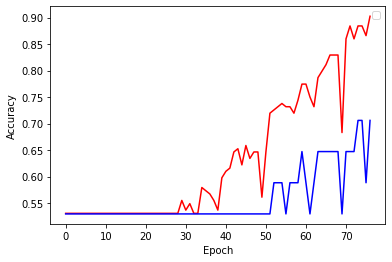

In [514]:
import matplotlib.pyplot as plt
test_avg = []
for i in range(1):
    model = Net(dim=656)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.6)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)

    train_epoch=[]
    test_epoch=[]
    epoch = 1
    train_acc=0
    while train_acc < 0.9 and epoch < 100:
        loss = train(epoch)
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        train_epoch.append(train_acc)
        test_epoch.append(test_acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        epoch +=1

    plt.plot(train_epoch, color="red")
    plt.plot(test_epoch, color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))

Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)


C:\Users\sandr\AppData\Local\Temp/ipykernel_10980/2571792903.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x) #.to(torch.int)


Epoch: 001, Loss: 1.3295, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 1.4438, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 1.0010, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7609, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7036, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7021, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.6957, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7154, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 009, Loss: 0.7474, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 010, Loss: 0.8652, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 011, Loss: 0.6982, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 012, Loss: 0.6978, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 013, Loss: 0.7167, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 014, Loss: 0.7409, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 015, Loss: 0.8542, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 016, Loss: 0.7076, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 0

No handles with labels found to put in legend.


Epoch: 060, Loss: 0.2054, Train Acc: 0.9085, Test Acc: 0.4706
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.0994, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 2.2145, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 1.2300, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.8721, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.8628, Train Acc: 0.5244, Test Acc: 0.4706
Epoch: 006, Loss: 0.7560, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7017, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7180, T

No handles with labels found to put in legend.


Epoch: 047, Loss: 0.3204, Train Acc: 0.9512, Test Acc: 0.5882
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.0413, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.8457, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7336, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7064, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7178, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7115, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7185, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7204, T

No handles with labels found to put in legend.


Epoch: 088, Loss: 0.2076, Train Acc: 0.9146, Test Acc: 0.6471
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.9856, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7416, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7156, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7021, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7107, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7025, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7257, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7060, T

No handles with labels found to put in legend.


Epoch: 099, Loss: 0.2965, Train Acc: 0.8659, Test Acc: 0.4118
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.7369, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7805, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7277, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7235, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7152, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7197, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7142, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7185, T

No handles with labels found to put in legend.


Epoch: 099, Loss: 0.3481, Train Acc: 0.8476, Test Acc: 0.7647
Test accuracy: 0.5764705882352941
Test stv: 0.12561268531801542


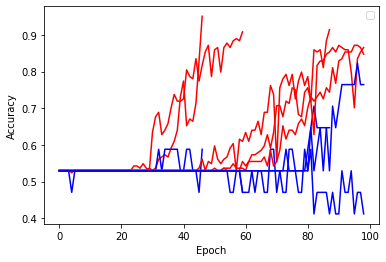

In [516]:
import matplotlib.pyplot as plt
test_avg = []
for i in range(5):
    model = Net(dim=656)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.6)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)

    train_epoch=[]
    test_epoch=[]
    epoch = 1
    train_acc=0
    while train_acc < 0.9 and epoch < 100:
        loss = train(epoch)
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        train_epoch.append(train_acc)
        test_epoch.append(test_acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        epoch +=1

    plt.plot(train_epoch, color="red")
    plt.plot(test_epoch, color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))

Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)


C:\Users\sandr\AppData\Local\Temp/ipykernel_10980/2571792903.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x) #.to(torch.int)


Epoch: 001, Loss: 1.3568, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7576, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7205, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7074, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7158, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7134, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7128, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7138, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 009, Loss: 0.7129, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 010, Loss: 0.7145, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 011, Loss: 0.7307, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 012, Loss: 0.7207, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 013, Loss: 0.7146, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 014, Loss: 0.7343, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 015, Loss: 0.7030, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 016, Loss: 0.7539, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 0

No handles with labels found to put in legend.


Epoch: 099, Loss: 0.3799, Train Acc: 0.8415, Test Acc: 0.5882
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.3321, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7126, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 1.2545, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.9706, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7488, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7302, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7045, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7581, T

No handles with labels found to put in legend.


Epoch: 073, Loss: 0.2739, Train Acc: 0.9024, Test Acc: 0.6471
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.8423, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.8172, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7316, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7373, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7265, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7324, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7558, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7627, T

No handles with labels found to put in legend.


Epoch: 073, Loss: 0.1845, Train Acc: 0.9085, Test Acc: 0.7647
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.4235, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 1.9164, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7095, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7128, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7166, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7102, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7191, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7204, T

No handles with labels found to put in legend.


Epoch: 099, Loss: 0.3039, Train Acc: 0.8963, Test Acc: 0.6471
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.9347, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7891, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7263, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7172, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7202, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7269, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7193, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7236, T

No handles with labels found to put in legend.


Epoch: 093, Loss: 0.2156, Train Acc: 0.9146, Test Acc: 0.5882
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.8945, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7988, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7145, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7129, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7235, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7269, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7201, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7277, T

No handles with labels found to put in legend.


Epoch: 083, Loss: 0.3244, Train Acc: 0.9268, Test Acc: 0.6471
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.1026, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7278, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7185, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7150, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7241, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7183, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7157, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.8460, T

No handles with labels found to put in legend.


Epoch: 094, Loss: 0.1813, Train Acc: 0.9146, Test Acc: 0.4118
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.1234, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 1.4658, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7397, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7214, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7136, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7466, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7156, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7519, T

No handles with labels found to put in legend.


Epoch: 065, Loss: 0.2949, Train Acc: 0.9024, Test Acc: 0.5882
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.2798, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 1.7430, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7347, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7402, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7562, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7632, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7458, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7260, T

No handles with labels found to put in legend.


Epoch: 099, Loss: 0.4116, Train Acc: 0.8049, Test Acc: 0.4118
Net(
  (conv1): GraphConv(41, 656)
  (pool1): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(656, 656)
  (pool2): SAGPooling(GraphConv, 656, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 41)
  (lin1): Linear(in_features=1312, out_features=50, bias=True)
  (lin2): Linear(in_features=500, out_features=10, bias=True)
  (lin3): Linear(in_features=50, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.7588, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 002, Loss: 0.7300, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 003, Loss: 0.7261, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 004, Loss: 0.7286, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 005, Loss: 0.7186, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 006, Loss: 0.7157, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 007, Loss: 0.7186, Train Acc: 0.5305, Test Acc: 0.5294
Epoch: 008, Loss: 0.7265, T

No handles with labels found to put in legend.


Epoch: 099, Loss: 0.5440, Train Acc: 0.7012, Test Acc: 0.5882
Test accuracy: 0.5882352941176471
Test stv: 0.10188534162169867


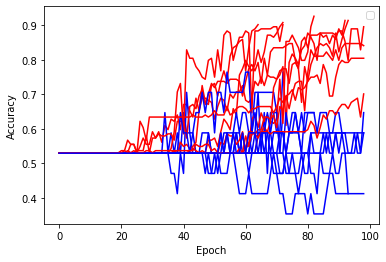

In [527]:
import matplotlib.pyplot as plt
test_avg = []
for i in range(10):
    model = Net(dim=656)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.6)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)

    train_epoch=[]
    test_epoch=[]
    epoch = 1
    train_acc=0
    while train_acc < 0.9 and epoch < 100:
        loss = train(epoch)
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        train_epoch.append(train_acc)
        test_epoch.append(test_acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        epoch +=1

    plt.plot(train_epoch, color="red")
    plt.plot(test_epoch, color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))